In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

NUM_ITERATIONS = 10000

training_data = pd.read_csv("/kaggle/input/random-linear-regression/train.csv").dropna()
testing_data = pd.read_csv("/kaggle/input/random-linear-regression/test.csv").dropna()
x_train = training_data["x"].to_numpy()
x_train /= x_train.max()
y_train = training_data["y"].to_numpy()
y_train /= y_train.max()
x_test = testing_data["x"].to_numpy()
y_test = testing_data["y"].to_numpy()




/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
def cost_function (x, y, w, b): 
    '''
    x: numpy_array
    y: numpy_array
    '''
    m = x.size
    cost = 0
    
    for i in range(m):
        y_hat = x[i] * w + b
        cost += (y_hat - y[i]) ** 2
    cost /= 2 * m
    return cost

def gradient_weight(x, y, w, b):
    m = x.size
    delta = 0
    
    for i in range(m):
        y_hat = x[i] * w + b
        delta += (y_hat - y[i]) * x[i] / m
    
    return delta

def gradient_bias(x, y, w, b):
    m = x.size
    delta = 0
    
    for i in range(m):
        y_hat = x[i] * w + b
        delta += (y_hat - y[i])/m
    
    return delta

In [3]:
weight = 0
bias = 0
learning_rate = 0.01

for i in range (NUM_ITERATIONS):
#     print(weight, bias)
    w = weight
    b = bias
    dw = gradient_weight(x_train, y_train, w, b)
    db = gradient_bias(x_train, y_train, w, b)
#     if (i < 100):
#         print(dw, db)
    weight -= learning_rate * gradient_weight(x_train, y_train, w, b)
    bias -= learning_rate * gradient_bias(x_train, y_train, w, b)




0.9181488554636857 -0.000467378317825051


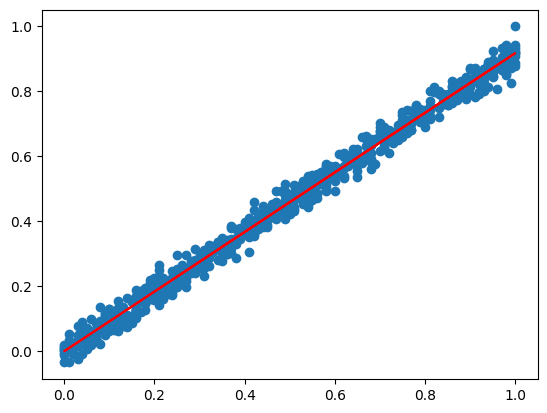

In [4]:
plt.scatter(x_train, y_train)
plt.plot(x_train, weight*x_train + bias, color="red")
print(weight, bias)